In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Mall_Customers=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
print(Mall_Customers.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Mall_Customers['gender_binary'] = le.fit_transform(Mall_Customers['Genre'])


In [7]:
X = Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']]

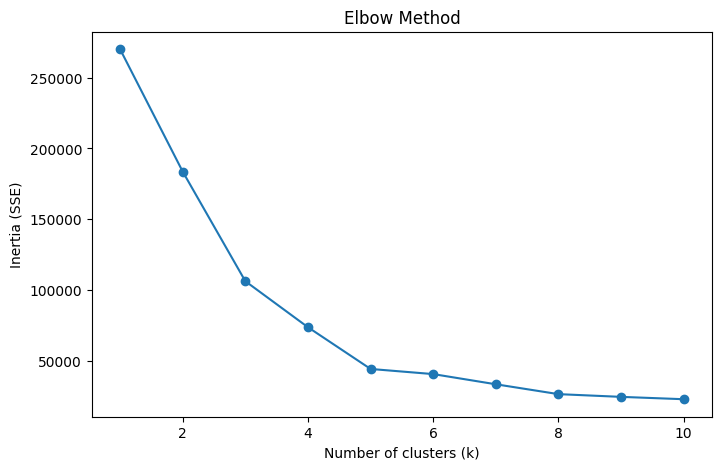

In [8]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
Mall_Customers["Cluster"] = kmeans.fit_predict(Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
Mall_Customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),gender_binary,Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,3


In [11]:
income_and_spending_score = {
    0: 'Low income – High spend',
    1: 'High income – Low spend',
    2: 'Medium income – Medium spend',
    3: 'High income – High spend',
    4: 'Low income – Low spend'
}

In [12]:
Mall_Customers['income_and_spending_score'] = Mall_Customers['Cluster'].map(income_and_spending_score)



In [13]:
Mall_Customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),gender_binary,Cluster,income_and_spending_score
0,1,Male,19,15,39,1,4,Low income – Low spend
1,2,Male,21,15,81,1,2,Medium income – Medium spend
2,3,Female,20,16,6,0,4,Low income – Low spend
3,4,Female,23,16,77,0,2,Medium income – Medium spend
4,5,Female,31,17,40,0,4,Low income – Low spend
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1,High income – Low spend
196,197,Female,45,126,28,0,3,High income – High spend
197,198,Male,32,126,74,1,1,High income – Low spend
198,199,Male,32,137,18,1,3,High income – High spend


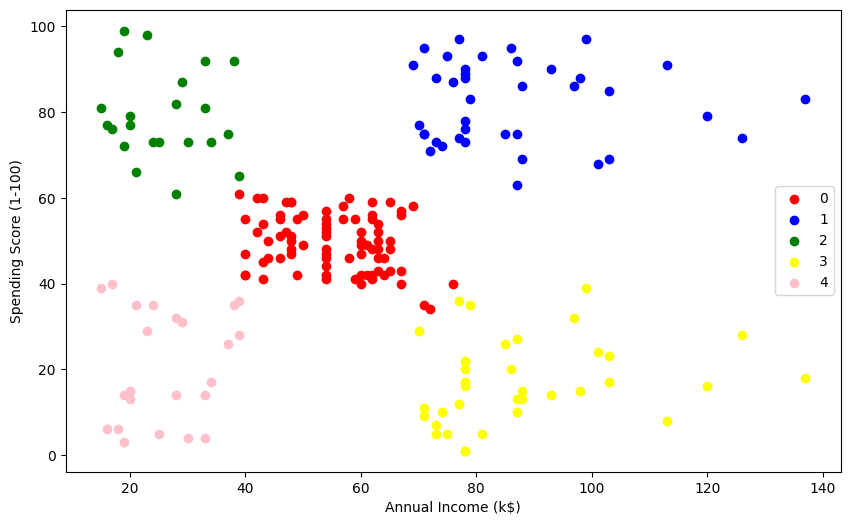

In [15]:
plt.figure(figsize=(10,6))
colors=['red','blue','green','yellow','pink']
for i in range(5):
  clusterd=Mall_Customers[Mall_Customers['Cluster']==i]
  plt.scatter(clusterd['Annual Income (k$)'],clusterd['Spending Score (1-100)'],color=colors[i],label=i)
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.legend()